# SAS 프로그램 결과<a class="anchor" id="sas--------"></a>

In [21]:
import saspy #SAS출력 코드

winlocal 입력

## 3장

In [22]:
%%SAS

libname ex 'C:\Biostat';
run;

/*3장 연습문제 불러오기*/
%macro chap03(name=,no=);
%do i=1 %to &no.;
	PROC IMPORT DBMS=excel
		DATAFILE="C:\Biostat\data_chap03"
		OUT=ex.&name.&i. REPLACE;
		RANGE="exam3_&i.$";
	RUN;
%end;
%mend;

%chap03(name=ex3_,no=6);

### EXAMPLE 3.1

In [23]:
%%SAS

proc means data=ex.ex3_1 noprint;
    var length;
    output out=ex.ex3_1stat(drop=_type_ _freq_) sum=sum n=sample_size mean=mean;
run;

proc print data=ex.ex3_1stat noobs;
run;

sum,sample_size,mean
95,24,3.95833


### EXAMPLE 3.2

k,n,X_bar,n_divided_by_2,L,G,B,W,Estimated_median
13,24,3.96,12,3.95,4,11,0.1,3.975

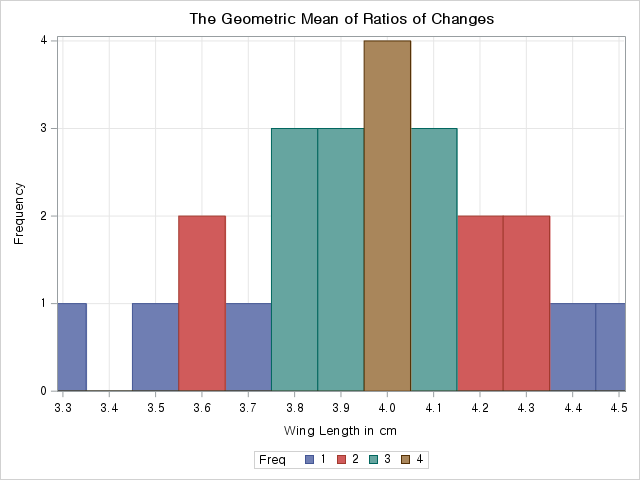

In [24]:
%%SAS


/*빈도 곱한 데이터 생성*/
data ex.ex3_2_sum; 
set ex.ex3_2 ;
fX = X * Freq;
run;

proc iml;
use ex.ex3_2_sum;
read all;
close exam3_2_sum;
k = nrow(X);
n = sum(Freq); /*총빈도*/
n_divided_by_2 = n/2;
X_bar = round(sum(fX) / n, 0.01);
L = (3.9+4.0)/2; /*예상구간의 하한값*/
G=Freq[8]; /*예상구간빈도*/
B=Freq[1]+Freq[2]+Freq[3]+Freq[4]+Freq[5]+Freq[6]+Freq[7]; /*누적빈도*/
W = X[2] - X[1];
Estimated_median = L + ((n/2)-B)/G * W;
print k n X_bar n_divided_by_2 L G B W Estimated_median ;
run;

proc sgplot data=ex.ex3_2;
	histogram x / group=freq scale=count freq=freq;
	xaxis label='Wing Length in cm' grid values= (3.3 to 4.5 by 0.1);
	yaxis label='Frequency' grid values= (0 to 4 by 1);
run;

### EXAMPLE 3.3

In [25]:
%%SAS
PROC MEANS DATA=ex.ex3_3 MEAN MEDIAN MAXDEC=2;
class group;
var lifespan;
RUN;


### EXAMPLE 3.4

In [26]:
%%SAS

/*GM*/
PROC SURVEYMEANS DATA=ex.ex3_4 MEAN GEOMEAN PLOTS=none;
    var ratio;
RUN;

data ex.ex3_4_keep;
set ex.ex3_4;
keep ratio;
if ratio=. then delete;
run;
proc iml;
use ex.ex3_4_keep;
read all;
close ex.ex3_4_keep;
arithmetic_mean = round( mean(ratio), 0.0001) ;
Final_population1 = round(10000*(arithmetic_mean**4), 1);
geometric_mean = round( geomean(ratio), 0.0001);
Final_population2 = round(10000*(geometric_mean**4), 1);
print arithmetic_mean Final_population1 geometric_mean Final_population2;
TITLE 'The Geometric Mean of Ratios of Changes';
run;quit;

### EXAMPLE 3.5

In [27]:
%%SAS
PROC IML;
use ex.ex3_5; 
read all; 
close ex.ex3_5;
mean=mean(x);
har_mean= round(2/(sum(1/x)),0.01);
print mean har_mean;
RUN;
QUIT;

mean,har_mean
30,26.67


### EXAMPLE 3.6

In [28]:
%%SAS
PROC IML;
use ex.ex3_6; read all; close ex.ex3_6;
A=840;
mean1=mean(x1);
mean2 = mean(code1);
raw_mean = mean2 +A;
print mean1 mean2 raw_mean;
RUN;
QUIT;

DATA ex.ex3_6_1;
set ex.ex3_6;
if x2='.' then delete;
if code2='.' then delete;
if x2=95000 then x2=x2/10;
RUN;

PROC IML;
use ex.ex3_6_1; read all; close ex.ex3_6_1;
B=0.001;
B2= x2*B;
mean1= mean(x2);
mean2= mean(B2);
raw_mean=mean2/B;
print mean1 mean2 raw_mean;
RUN;
QUIT;


mean1,mean2,raw_mean
846,6,846
mean1,mean2,raw_mean
10500,10.5,10500
